**<h1><center>COVID-19 VACCINATIONS - FINAL PROJECT</h1>** 
<h3><center>D590: Data Visualization , Summer 2022</h3>



<h4><center>Luddy School of Informatics, Computing and Engineering, Indiana University</h4>

<br>

**<h6>Name: Anitha Ganapathy | Keerthana Reddy Varakala | Saymon 
Mameza<br>Email: aganapa@iu.edu | kvarakal@iu.edu | kvarakal@iu.edu <br></h6>**
<br>
___

# Data source
- https://ourworldindata.org/covid-vaccinations
- https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations


# Install packages

In [ ]:
import datetime

start_time = datetime.datetime.now()

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 984 kB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=1a83f04b027e181b343a4dc39e0e55fe74b3566c554eecc115745adaeb7288f6
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=a388e08ea5fe10c30cc7804a724092c231986208b6ff44487709546473ebe670
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# Data pre-processing libraries
import pandas as pd
import numpy as np
import calendar  # for converting the month int to 3 letter name

# Data Visulaisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

import cufflinks as cf
cf.go_offline(connected=True) # plotly also serves online, but we are using just a sample
# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

# %matplotlib inline
# Use Plotly locally
cf.go_offline()



import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from PIL import Image
import urllib
import pycountry

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
mesh = go.Mesh3d(x=[0,1,0],y=[0,0,1],z=[0,0,0],i=[0],j=[1],k=[2],flatshading=False,color='#333333')
py.iplot([mesh])

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')  

# dirpath = '/content/drive/MyDrive/Data/vaccinations/'
# !ls $dirpath

## Unused datatsets

In [ ]:
# url_loc_age       = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations-age.csv'	    
# url_loc           = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv'
# url_loc_manuf     = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations-manufacturer.csv'  


# df_loc_age       = pd.read_csv(url_loc_age      ) # has only the source locations for each country : NO USE
# df_loc           = pd.read_csv(url_loc          ) # country, iso_code with list of vaccines used by that country : NO USE
# df_loc_manuf     = pd.read_csv(url_loc_manuf    ) # has only the source locations for each country : NO USE

## Datasets download

In [ ]:
url_vacc_age_grp  = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv'
url_vacc_manuf    = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
url_us_state_vacc = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv'
url_vaccination   = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'

df_vacc_age_grp  = pd.read_csv(url_vacc_age_grp ) 
df_vacc_manuf    = pd.read_csv(url_vacc_manuf   )  
df_us_state_vacc = pd.read_csv(url_us_state_vacc) 
df_vaccination   = pd.read_csv(url_vaccination  ) 

# EDA

## Vaccinations Manufacturer

In [ ]:
print(df_vacc_age_grp.shape)
print(df_vacc_manuf.shape)   
print(df_us_state_vacc.shape)

(44831, 6)
(41730, 4)
(35364, 16)


In [ ]:
df_vacc_manuf[df_vacc_manuf['location'] == 'United States'].head(5)

,location,date,vaccine,total_vaccinations
34096,United States,2021-01-12,Moderna,3835859
34097,United States,2021-01-12,Pfizer/BioNTech,5488697
34098,United States,2021-01-13,Moderna,4249795
34099,United States,2021-01-13,Pfizer/BioNTech,6025872
34100,United States,2021-01-15,Moderna,5122662


In [ ]:
# create a df for USA and reset the index
usa_vaccines = df_vacc_manuf[df_vacc_manuf['location'] == 'United States']
usa_vaccines.reset_index(inplace=True)
usa_vaccines = usa_vaccines.drop(['index'], axis = 1)


usa_vaccines['date'] =  pd.to_datetime(usa_vaccines['date'],format='%Y-%m-%d')
usa_vaccines['year'] = pd.DatetimeIndex(usa_vaccines['date']).year
usa_vaccines['month'] = pd.DatetimeIndex(usa_vaccines['date']).month

# fetching the last record of every date usingthe tail(1)

usa_vaccines_agg = usa_vaccines.groupby(['year', 'month', 'vaccine'],  as_index=False).tail(1)
usa_vaccines_agg = usa_vaccines_agg.reset_index()
usa_vaccines_agg = usa_vaccines_agg.drop(['index'], axis = 1)
usa_vaccines = usa_vaccines.set_index('date')

usa_vaccines_agg.head()

,location,date,vaccine,total_vaccinations,year,month
0,United States,2021-01-31,Moderna,14246089,2021,1
1,United States,2021-01-31,Pfizer/BioNTech,16775916,2021,1
2,United States,2021-02-28,Moderna,36694414,2021,2
3,United States,2021-02-28,Pfizer/BioNTech,38426567,2021,2
4,United States,2021-03-31,Johnson&Johnson,3307113,2021,3


In [ ]:
usa_vaccines_agg.vaccine.unique()

array(['Moderna', 'Pfizer/BioNTech', 'Johnson&Johnson'], dtype=object)

https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

In [ ]:
d = dict(enumerate(calendar.month_abbr))
usa_vaccines_agg['month'] = usa_vaccines_agg['month'].map(d)

In [ ]:
usa_vaccines_agg.head()

,location,date,vaccine,total_vaccinations,year,month
0,United States,2021-01-31,Moderna,14246089,2021,Jan
1,United States,2021-01-31,Pfizer/BioNTech,16775916,2021,Jan
2,United States,2021-02-28,Moderna,36694414,2021,Feb
3,United States,2021-02-28,Pfizer/BioNTech,38426567,2021,Feb
4,United States,2021-03-31,Johnson&Johnson,3307113,2021,Mar


https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460

In [ ]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Year",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Total Vaccinations (total doses)",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
    
    barmode="stack",
    title_text='Total Quantity of types of vaccines used in USA(total doses)',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),                 
)

# colors = ["#2A66DE", "#FFC32B",  '#EF553B']
colors = ["blue", "orange",  'green']

for r, c in zip(usa_vaccines_agg.vaccine.unique(), colors):
    plot_df = usa_vaccines_agg[usa_vaccines_agg.vaccine == r]
    fig.add_trace(
        go.Bar(x=[plot_df.year, plot_df.month], y=plot_df.total_vaccinations, name=r, marker_color=c),
    )
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")


## Top vaccinated states in USA

In [ ]:
df_us_state_vacc.head(1)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN


In [ ]:
# df_us_state_vacc.dropna(inplace=True, axis=0)
# df_us_state_vacc.head(5)

In [ ]:
fetch_date = df_us_state_vacc.iloc[-1].date
filter_on ="people_vaccinated"

df_grp = df_us_state_vacc[df_us_state_vacc.date == fetch_date]

top_vaccinated_states = df_grp.sort_values([filter_on], ascending=[False])
top_vaccinated_states = top_vaccinated_states.set_index('location')
top_vaccinated_states.drop(['United States'], inplace=True)
top_vaccinated_states.head(1)

,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
location,,,,,,,,,,,,,,,
California,2022-07-13,78235248.0,96720855.0,32900559.0,72.95,198.0,28824931.0,83.27,244.79,NaN,34426.0,871.0,0.809,15815756.0,40.03


In [ ]:
# sns.barplot(df_grp.location, df_grp.total_vaccinations)

select_n_states = 15

fig = px.bar(top_vaccinated_states[filter_on][:select_n_states], 
            #  color_discrete_sequence=px.colors.qualitative.Antique
             )
fig.update_traces(marker_color='steelblue')

fig.update_layout(
    showlegend = False,
    template="simple_white",
    xaxis=dict(title_text="States",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text=filter_on,
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text=f'Top {select_n_states} vaccinated states in USA',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),
            
                  
)
fig.show(renderer="colab")

## Top vaccinated countries

In [ ]:
df_vacc_manuf.head(1)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2


In [ ]:
df_country = df_vacc_manuf.groupby(['location', 'vaccine']).tail(1)

# Creates a pivot table with margins named 'All'
# Sorts by 'All' column
# Drops the margins
# Plots the stacked barplot
df_to_plot = df_country.pivot_table(columns='vaccine',
               index='location',
               values='total_vaccinations',
               aggfunc=sum,
               margins=True).\
    sort_values(by='All', ascending=False).\
    drop('All').drop('All', axis=1)

# df_to_plot[:15].plot.bar(stacked=True);

In [ ]:
fig = px.bar(df_to_plot[:10], 
             )

fig.update_layout(
    showlegend = True,
    legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
    legend_title = dict(font = dict(family = "Arial", size = 40, color = "Black")),
    template="simple_white",
    xaxis=dict(title_text="Countries",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Total Vaccination",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text= f'Top 10 countries with most used vaccinations',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),                  
)

fig.show(renderer="colab")

# World Vaccination Situation

In [ ]:
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [ ]:
# df_vaccination.location.unique()

In [ ]:
usa_vac = df_vaccination[df_vaccination['location'] == 'United States']
uk_vac = df_vaccination[df_vaccination['location'] == 'United Kingdom']
ger_vac= df_vaccination[df_vaccination['location'] == 'Germany']
ind_vac= df_vaccination[df_vaccination['location'] == 'India']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=usa_vac['date'], y=usa_vac['daily_vaccinations'], mode='lines+markers', name='USA'))
fig.add_trace(go.Scatter(x=uk_vac['date'],y=uk_vac['daily_vaccinations'], mode='lines+markers', name='UK'))
fig.add_trace(go.Scatter(x=ger_vac['date'],y=ger_vac['daily_vaccinations'], mode='lines+markers', name='Germany'))
fig.add_trace(go.Scatter(x=ind_vac['date'],y=ind_vac['daily_vaccinations'], mode='lines+markers', name='India'))
fig.update_layout(
 title_text= 'Comparison of Daily Vaccinations',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),
                  template="seaborn",
                  
)
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

# Growth Chart of Vaccinations

In [ ]:
list(df_vaccination.columns)

['location',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'daily_vaccinations_per_million',
 'daily_people_vaccinated',
 'daily_people_vaccinated_per_hundred']

In [ ]:
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name

In [ ]:
df_vaccination.date = pd.to_datetime(df_vaccination.date, format="%Y/%m/%d")
df_usa_all = df_vaccination[df_vaccination['location'] == "United States"]
fig = px.line(df_usa_all, 
              x='date', 
              y= ['total_vaccinations',
                  'people_vaccinated',
                  'people_fully_vaccinated',
                  'total_boosters',
                  'daily_vaccinations'],
              title='Vaccination Metrics' , 
              )
fig.update_layout(
    showlegend = True,
    legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
    legend_title = dict(font = dict(family = "Arial", size = 30, color = "Black")),
    template="seaborn",
    xaxis=dict(title_text="Date",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Vaccination Metrics",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text= f' USA Vaccination Metrics (actual #)',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),                  
)

custom_legend_name(['Total Vaccinations',
                  'People Vaccinated',
                  'People Fully Vaccinated',
                  'Total Boosters',
                  'Daily Vaccinations'])


fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

In [73]:
df_vaccination.date = pd.to_datetime(df_vaccination.date, format="%Y/%m/%d")
df_usa_all = df_vaccination[df_vaccination['location'] == "United States"]
fig = px.line(df_usa_all, 
              x='date', 
              y= [
                  'daily_vaccinations_per_million',
                  'daily_people_vaccinated',
                  'daily_people_vaccinated_per_hundred'
                  ],
              title='Vaccination Metrics' , 
              )
fig.update_layout(
    showlegend = True,
    legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
    legend_title = dict(font = dict(family = "Arial", size = 30, color = "Black")),
    template="seaborn",
    xaxis=dict(title_text="Date",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Vaccination Metrics",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text= f' USA Daily Vaccinations Metrics',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),                  
)

custom_legend_name( [
                     'Daily Vaccinations per Million',
                  'Daily People Vaccinated',
                  'Daily People Vaccinated per Hundred'
                  ])
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

In [ ]:
df_vaccination.date = pd.to_datetime(df_vaccination.date, format="%Y/%m/%d")
df_usa_all = df_vaccination[df_vaccination['location'] == "United States"]
fig = px.line(df_usa_all, 
              x='date', 
              y= ['total_vaccinations_per_hundred',
                  'people_vaccinated_per_hundred',
                  'people_fully_vaccinated_per_hundred',
                  'total_boosters_per_hundred',],
              title='Vaccination Metrics' , 
              )
fig.update_layout(
    showlegend = True,
    legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
    legend_title = dict(font = dict(family = "Arial", size = 30, color = "Black")),
    template="seaborn",
    xaxis=dict(title_text="Date",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Vaccination Metrics",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text= f' USA Vaccination Metrics / hundred',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           )                
)
custom_legend_name(['Total Vaccinations per Hundred',
                  'People Vaccinated per Hundred',
                  'People Fully Vaccinated per Hundred',
                  'Total Boosters per Hundred'])
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

# Bar Chart Race: COVID-19 World Vaccination

###  Data Preparation

In [ ]:
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [ ]:
df_countries = df_vaccination[["date", "location", "daily_vaccinations"]]
df_countries.loc[:, "TotalVaccination"] = df_countries.groupby("location")["daily_vaccinations"].cumsum()
df_countries.head()

,date,location,daily_vaccinations,TotalVaccination
0,2021-02-22,Afghanistan,NaN,NaN
1,2021-02-23,Afghanistan,1367.0,1367.0
2,2021-02-24,Afghanistan,1367.0,2734.0
3,2021-02-25,Afghanistan,1367.0,4101.0
4,2021-02-26,Afghanistan,1367.0,5468.0


In [ ]:
pivot = df_countries.pivot(index = "date", columns = "location", values = "TotalVaccination")
pivot.tail()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106867970.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7483208.0,NaN
2022-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106922581.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7504554.0,NaN
2022-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106976597.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7526668.0,NaN
2022-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107028312.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7549549.0,NaN
2022-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107069211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot.index = pd.to_datetime(pivot.index)

expanded_df = pivot.asfreq("12H")
expanded_df.tail()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106976597.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7526668.0,NaN
2022-07-17 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107028312.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7549549.0,NaN
2022-07-18 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107069211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rank_df = expanded_df.rank(axis = 1, method = "first", ascending = False)

expanded_df = expanded_df.interpolate()
rank_df = rank_df.interpolate()

In [ ]:
type(rank_df)

pandas.core.frame.DataFrame

In [ ]:
display(expanded_df.tail(1))

display(rank_df.tail(1))

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-19,6415580.0,576280625.0,2903217.0,15211248.0,152956.0,20573934.0,24469.0,128804.0,107069211.0,2149955.0,...,55409944.0,309408.0,37861146.0,233932712.0,7318732.0,15924.0,1.217895e+10,857490.0,7549549.0,12024662.0


location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-19,91.0,12.0,118.0,78.0,164.0,59.0,134.0,186.0,11.0,143.0,...,45.0,165.0,51.0,19.0,81.0,214.0,1.0,153.0,31.0,69.0


###  Countries, Flags and some Utils

In [ ]:
# country_fil = dirpath + "countries_continents_codes_flags_url.csv"
countries = pd.read_csv("https://raw.githubusercontent.com/Anitha-Ganapathy/Data_Viz/main/countries_continents_codes_flags_url.csv")
countries.head()

,country,images_file,image_url,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,Flag_of_Afghanistan.svg,https://upload.wikimedia.org/wikipedia/commons...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Albania,Flag_of_Albania.svg,https://upload.wikimedia.org/wikipedia/commons...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
2,Algeria,Flag_of_Algeria.svg,https://upload.wikimedia.org/wikipedia/commons...,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,Andorra,Flag_of_Andorra.svg,https://upload.wikimedia.org/wikipedia/commons...,AD,AND,20.0,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
4,Angola,Flag_of_Angola.svg,https://upload.wikimedia.org/wikipedia/commons...,AO,AGO,24.0,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0


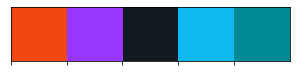

In [ ]:
colors_dict = {
    "Africa": "#F1480F", 
    "Americas": "#9736FF", 
    "Asia": "#101820", 
    "Europe": "#0EB8F1", 
    "Oceania": "#008B97"
}

sns.palplot(["#F1480F", "#9736FF", "#101820", "#0EB8F1", "#008B97"])

In [ ]:
continent_dict = dict(zip(countries.country, countries.region))

continent_dict["England"] = "Europe"
continent_dict["Scotland"] = "Europe"
continent_dict["Northern Ireland"] = "Europe"
continent_dict["Wales"] = "Europe"
continent_dict["Czechia"] = "Europe"

In [ ]:
# list(expanded_df.columns)

In [ ]:
list(pycountry.countries)[:10]

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', flag='🇦🇩', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', flag='🇦🇪', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', flag='🇦🇷', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', flag='🇦🇲', 

In [ ]:
countries = {}

for country in expanded_df.columns:    
    try:
        countries[country] = pycountry.countries.search_fuzzy(country)[0].alpha_2
    except:
        print(country)

Asia
Bonaire Sint Eustatius and Saba
Cape Verde
Democratic Republic of Congo
England
Europe
European Union
Faeroe Islands
High income
Laos
Low income
Lower middle income
North America
Northern Cyprus
Oceania
Scotland
South America
Upper middle income
World


In [ ]:
countries["Asia"] = "AS"
countries["England"] = "GB"
countries["Europe"] = "EU"
countries["European Union"] = "EU"
countries["Bonaire Sint Eustatius and Saba"] = "BQ"
countries["Cape Verde"] = "CV"
countries["Democratic Republic of Congo"] = "CD"
countries["Faeroe Islands"] = "FO"
countries["Laos"] = "LA"
countries["Northern Cyprus"] = "CY"
countries["South Korea"] = "KR"
countries["North America"] = "NA" 
countries["Oceania"] = "OC"
countries["Scotland"] = "GB"
countries["South America"] = "SA"

In [ ]:
for (key, item) in countries.items():
    if item == "GB":
        print(key)

Northern Ireland
United Kingdom
England
Scotland


In [ ]:
countries["England"] = "GB-ENG"
countries["Northern Ireland"] = "GB-NIR"
countries["Scotland"] = "GB-SCT"
countries["Wales"] = "GB-WLS"

In [ ]:
# expanded_df['High income']

In [ ]:
expanded_df = expanded_df.drop('High income', axis=1)
expanded_df = expanded_df.drop('Low income', axis=1) 
expanded_df = expanded_df.drop('Lower middle income', axis=1) 
expanded_df = expanded_df.drop('Oceania', axis=1)
expanded_df = expanded_df.drop('Upper middle income', axis=1)
expanded_df = expanded_df.drop('World', axis=1)

In [ ]:
%%time
img_dict = {}

for col in expanded_df.columns:
    img = Image.open(urllib.request.urlopen(f"https://raw.githubusercontent.com/google/region-flags/gh-pages/png/{countries[col]}.png"))
    img_dict[col] = img.convert("RGB")

CPU times: user 1.78 s, sys: 532 ms, total: 2.31 s
Wall time: 49.4 s


In [ ]:
legend = []

for (continent, color) in colors_dict.items():
    legend.append(
        Patch(facecolor = color, edgecolor = "#101820", alpha = 0.8, label = continent)
    )

In [ ]:
rank_df.shape , expanded_df.shape

((1189, 235), (1189, 229))

In [ ]:
del_list = ['Asia', 'Europe', 'High income', 'Low income', 'Lower middle income','Oceania','Upper middle income','World',
'Africa',
'Bonaire Sint Eustatius and Saba',
'British Virgin Islands',
'Cote d\'Ivoire',
'Curacao',
'European Union',
'Faeroe Islands',
'Falkland Islands',
'North America',
'North Macedonia',
'Northern Cyprus',
'Saint Helena',
'South America',
'Timor']

exp_del_list = ['Asia', 'Europe',
                'Africa',
'Bonaire Sint Eustatius and Saba',
'British Virgin Islands',
'Cote d\'Ivoire',
'Curacao',
'European Union',
'Faeroe Islands',
'Falkland Islands',
'North America',
'North Macedonia',
'Northern Cyprus',
'Saint Helena',
'South America',
'Timor'
]

rank_df.drop(del_list, axis =1, inplace=True)
expanded_df.drop(exp_del_list, axis =1, inplace=True)

In [ ]:
rank_df.shape, expanded_df.shape

((1189, 213), (1189, 213))

In [ ]:
# print(rank_df['Asia'].head())
# print(expanded_df['Asia'].head())

# continent_dict

In [ ]:
n_bars = 20

def get_bar_info(time):
    
    bar_location = rank_df.iloc[time].values
    top_filt = (bar_location > 0) & (bar_location < n_bars + 1)
    bar_location = bar_location[top_filt]
    bar_length = expanded_df.iloc[time].values[top_filt]
    cols = expanded_df.columns[top_filt]
    colors = [colors_dict[continent_dict[x]] for x in cols]
    
    return bar_location, bar_length, cols, colors

In [ ]:
# expanded_df['North America', 'Africa']
# continent_dict
expanded_list = set(expanded_df.columns)
cont_list = set(continent_dict.keys())
# expanded_list - cont_list


for col in expanded_df.columns:
  if col not  in cont_list:
    print(col)

In [ ]:
A, B, C, D = get_bar_info(111)
len(A), len(B), len(C), len(D)

(12, 12, 12, 12)

In [ ]:
# expanded_df.tail()

### Plotting

In [ ]:
def update(time):
        
    bar_location, bar_length, cols, colors = get_bar_info(time)
    # print(bar_location, bar_length, cols, colors)
    ax.clear()
    ax.set_facecolor("#E5E5E5")
    ax.tick_params(labelsize = 6)
    ax.grid(True, axis = "x", color = "#A4A4A4", linestyle = "--", alpha = 0.2)
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    ax.set_ylim(0.2, 20.8)
    
    ticks = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / 1e6))
    ax.xaxis.set_major_formatter(ticks)

    ax.barh(
        y = bar_location,
        width = bar_length,
        tick_label = cols,
        height = 0.8,
        color = colors,
        edgecolor = "#101820",
        alpha = 0.8
    )
        
    for i, col in enumerate(cols):
        
        img = img_dict[col]
        img = img.resize((100, 100))
        im = OffsetImage(img, zoom = 0.1)
        im.image.axes = ax

        ab = AnnotationBbox(
            im,
            (bar_length[i], bar_location[i]), 
            xybox = (-20, 0),
            frameon = False, 
            xycoords = "data",
            boxcoords = "offset points",
            pad = 0)
        
        ax.text(bar_length[i] + max(bar_length) / 100, bar_location[i] + 0.3, "{:,}".format(int(bar_length[i])), size = 5)

        ax.add_artist(ab)

    date = expanded_df.index[time].strftime("%d %B, %Y")
    ax.text(0.95, 0.4, date, transform = ax.transAxes, color = "#101820", size = 22, ha = "right", weight = 800)
    
    total_vaccination = expanded_df.iloc[time].sum()
    ax.text(0.95, 0.3, "Total Vaccination for World:    {:,}".format(int(total_vaccination)), 
            transform = ax.transAxes, color = "#101820", size = 6, ha = "right", weight = 400)
    
    ax.text(1.05, 0, "Millions", transform = ax.transAxes, color = "#101820", size = 5, ha = "right", weight = 400)
    
    ax.legend(handles = legend, bbox_to_anchor=(0.2, 0.95, 0.33, 0.1), ncol = 5,
              fontsize = 7, facecolor = "#E5E5E5", edgecolor = "#E5E5E5")

    ax.set_title("COVID-19 World Vaccination Progress\n")
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(pad = 20)

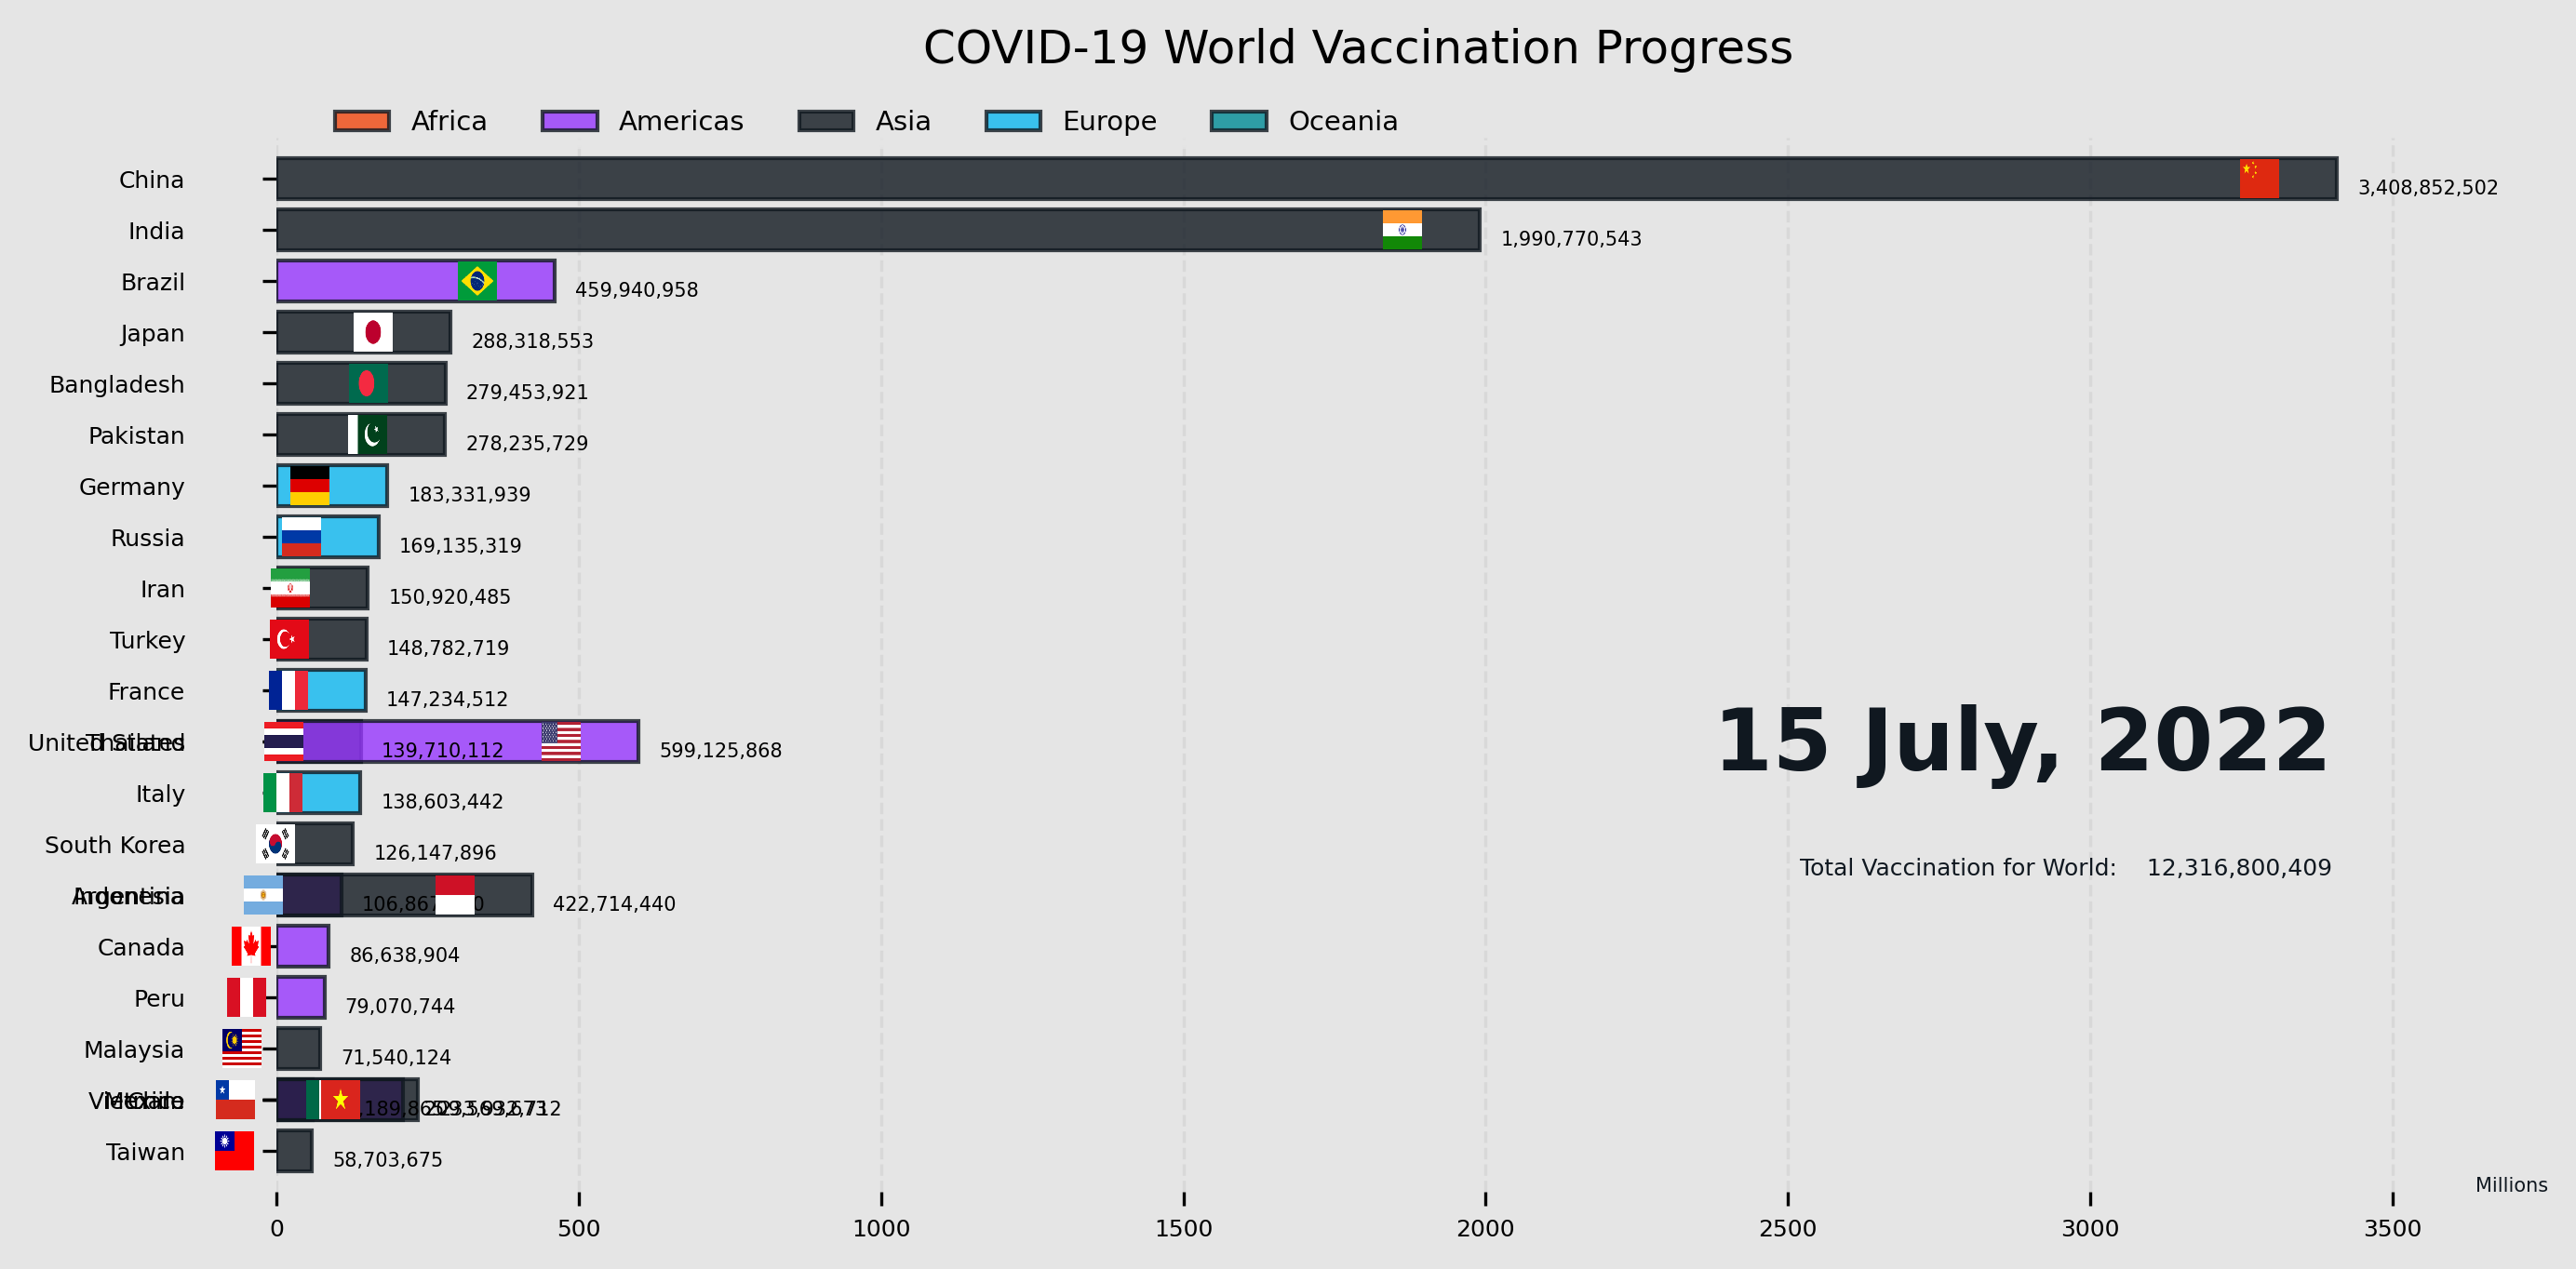

In [ ]:
import time
fig, ax = plt.subplots(figsize = (10, 5), dpi = 300, facecolor = "#E5E5E5")

# for t in range(600, 1170, 2):
#   # update(1170)  
#   update(t)
#   time.sleep(3)
update(1180)  

### Animation

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 300, facecolor = "#E5E5E5")

plt.close()

animator = FuncAnimation(
    fig, 
    update, 
    frames = range(16, len(expanded_df)), 
    interval = 100, 
    repeat = True, 
    save_count = range(16, len(expanded_df))
)

In [ ]:
video_html = animator.to_html5_video().replace('width="3000"', 'width="1200"').replace('height="1500"', 'height="700"')
HTML(video_html)

Output hidden; open in https://colab.research.google.com to view.

# Convert the notebook to HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/Final_Vaccination_NB.ipynb


[NbConvertApp] WARNING | pattern '/content/Final_Vaccination_NB.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T

CalledProcessError: ignored

# NB Run time

In [ ]:
end_time = datetime.datetime.now()
print("Time taken to run the notebook : ", end_time - start_time)